<h1 style="font-size:3rem;color:deepskyblue;">Movie Industry Dataset</h1>

# Content
The dataset used is from Kaggle. Click [here](https://www.kaggle.com/danielgrijalvas/movies) to download the dataset in csv format.

## Import libraries and read csv file

In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# adjust the configuration of the plots we will create
matplotlib.rcParams['figure.figsize'] = (12,8)

# read in the data

df = pd.read_csv(r'C:\Users\amirulafif\Desktop\Portfolio_Python\movies.csv')

## Quick summary of dataset

In [2]:
# show first 10 rows from the dataset

df.head(n=10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


## Check for missing data

In [3]:
# show percentage of missing/null data for each columns

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


## Data types of columns

In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Change data types of columns

In [5]:
# replace all NaN elements with 0
df = df.fillna(0)

# change data types
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

# show data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

## Splitting column

In [6]:
# 'year' and 'released' contain different years in some columns
# split 'released' column into year and country

df[['year_corr', 'country_corr']] = df['released'].str.split('(',expand=True)
df['country_corr'] = df['country_corr'].str[:-1]
df['year_corr'] = df['year_corr'].str[-5:-1]
df[['name', 'year', 'year_corr', 'country', 'country_corr']].head(n=20)

,name,year,year_corr,country,country_corr
0,The Shining,1980,1980,United Kingdom,United States
1,The Blue Lagoon,1980,1980,United States,United States
2,Star Wars: Episode V - The Empire Strikes Back,1980,1980,United States,United States
3,Airplane!,1980,1980,United States,United States
4,Caddyshack,1980,1980,United States,United States
5,Friday the 13th,1980,1980,United States,United States
6,The Blues Brothers,1980,1980,United States,United States
7,Raging Bull,1980,1980,United States,United States
8,Superman II,1980,1981,United States,United States
9,The Long Riders,1980,1980,United States,United States


## Sorting values in column

In [7]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head(n=10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corr,country_corr
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,United States
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019,United States
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015,United States
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012,United States
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015,United States
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019,United States


## Setting Options

In [8]:
# set to display all rows
# uncomment below to use
# else, leave it to display summarized version
# pd.set_option('display.max_rows', None)

## Remove duplicates

In [9]:
# drop any duplicates

df['company'] = df['company'].astype(str)
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
7657                                      0
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2386, dtype: object

## Budget vs Gross

Hypothesis:
The higher the budget, the higher the gross earnings of the movie

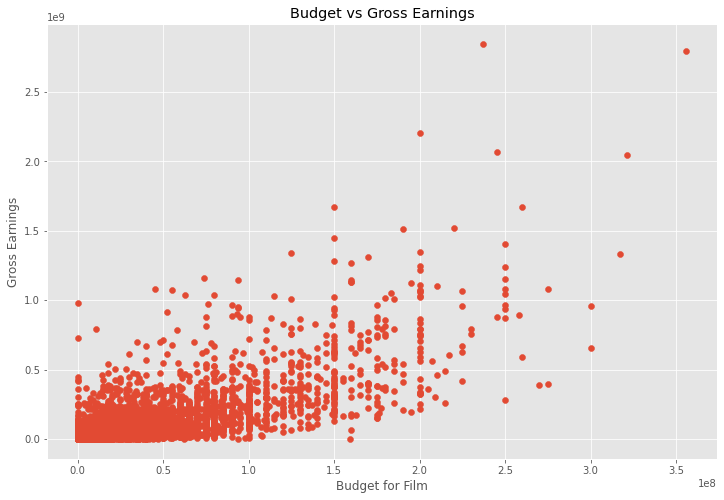

In [10]:
# scatter plot

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

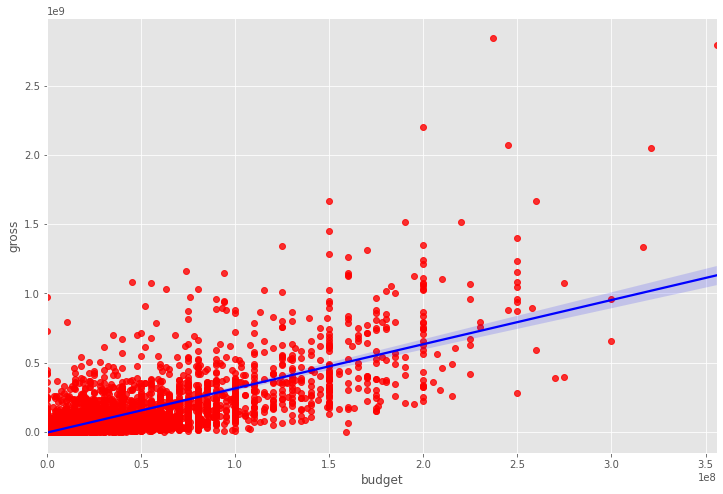

In [14]:
# use seaborn to plot
# + correlation line

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [11]:
# look at correlation
# only numerical values are considered

df.corr(method='pearson') # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


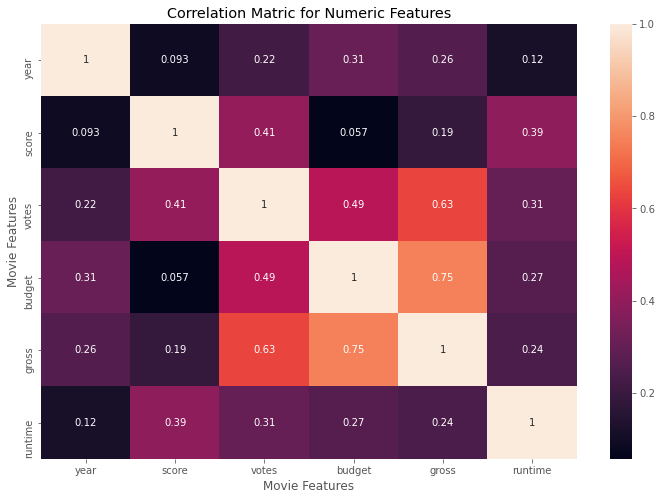

In [12]:
# create a correlation matrix for easy comparison

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

## Company vs Gross

Finding correlation between company and gross earnings

In [14]:
# company is not numeric
# each unique value will be given unique ID for each column

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corr,country_corr
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,29,56
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,39,56
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,17,56
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,35,56
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,38,56


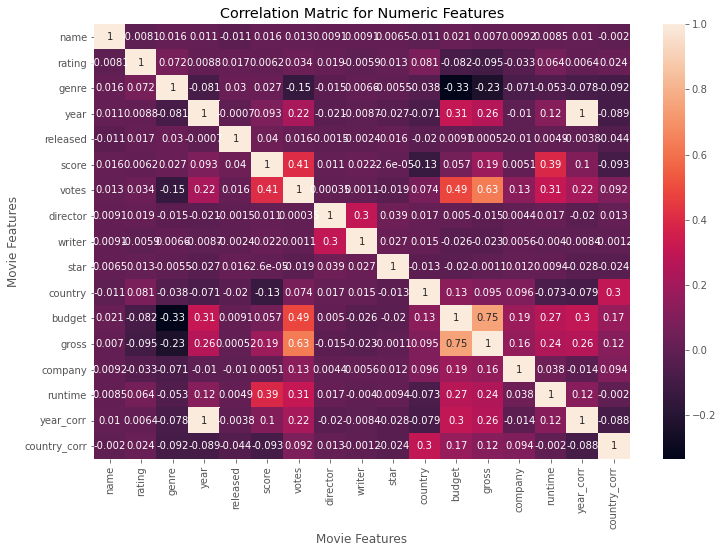

In [15]:
# view in form of matrix

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [16]:
# view in form of table

df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corr,country_corr
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009212,0.008483,0.010225,-0.001968
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032954,0.064133,0.006403,0.023977
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071066,-0.052914,-0.078210,-0.091572
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010433,0.116358,0.996397,-0.089289
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010471,0.004852,-0.003775,-0.044096
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005067,0.394564,0.100897,-0.092741
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133455,0.306984,0.217782,0.091945
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.020385,0.013331
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005644,-0.004036,-0.008391,-0.001201
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012437,0.009418,-0.027606,-0.023540


In [18]:
# unstack the matrix by pairs

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
                                ...   
country_corr  gross           0.119313
              company         0.093961
              runtime        -0.002013
              year_corr      -0.088402
              country_corr    1.000000
Length: 289, dtype: float64

In [21]:
# sort the correlation pairs by values

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
gross         genre          -0.234297
genre         gross          -0.234297
              votes          -0.145296
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
year_corr     year_corr       1.000000
country_corr  country_corr    1.000000
Length: 289, dtype: float64

In [22]:
# only show correlation with highest values
# exclude 1.0 because those are same pairs

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr = high_corr[(high_corr) < 1]
high_corr

votes      gross        0.632870
gross      votes        0.632870
           budget       0.750157
budget     gross        0.750157
year       year_corr    0.996397
year_corr  year         0.996397
dtype: float64

In [24]:
# also exclude year and year_corr as those are not relevant

high_corr = high_corr[(high_corr) < 0.99]
high_corr

votes   gross     0.632870
gross   votes     0.632870
        budget    0.750157
budget  gross     0.750157
dtype: float64

## Conclusion

+ Company has no correlation with gross earnings
+ The higher the votes, the higher the gross earnings
+ The higher the budget, the highe the gross earnings